In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#df_folder = '/Users/ayesh/Downloads/pull/complete_data/usable/' ## origional threshold
#df_folder = '/Users/ayesh/Downloads/exp1/complete_data/usable/' ## AB3 at 75%, no AC exclusions
#df_folder = '/Users/ayesh/Downloads/Emoinference_dt/orig_exp1/complete_data/' ## no exclusions
df_folder = '/Users/ayesh/Downloads/right_thresh/1/complete_data/usable/' ## AB3 at 66%
 
behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []
all_good = []
not_usable = []

for b in behav_files:
    if b[-4:] == ".csv":
        csv_list.append(df_folder + b)
        
for a in csv_list:
    try:
        one_file = pd.read_csv(a, header = 0)
        one_file.columns = one_file.columns.str.replace(".", "_")
        fin_q = 'key_resp_33_keys'
        #subid = 'workerID'
        if fin_q in one_file.columns:
            all_good.append(a)
        else:
            not_usable.append(one_file.workerID[0])
    except Exception as e:
        print(e)


In [4]:
print("notusable =" , not_usable)

#print(all_good)

notusable = []


In [5]:
subid = []
avg_AB1 = []
avg_AB2 = []
avg_AB3 = []
avg_BC = []
avg_AC = []
avg_ABfinal = []
avg_BCfinal = []

for pt_file in all_good:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    finalABcorr = df.key_resp_30_corr
    finalBCcorr = df.key_resp_31_corr
    #allgood_check = df.key_resp_33_keys[480]

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    finalAB_trialresp = df.key_resp_30_keys
    finalBC_trialresp = df.key_resp_31_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BC_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    finalAB_trialresp_rt = df.key_resp_30_rt
    finalBC_trialresp_rt = df.key_resp_31_rt
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    t_finalABtrials = []
    t_finalBCtrials = []
    
    t_AB1corr = []
    t_AB2corr = []
    t_AB3corr = []
    t_BCcorr = []
    t_ACcorr = []
    t_finalABcorr = []
    t_finalBCcorr = []
    
    for index, row in df.iterrows():
        try:
            
            if np.isnan(AB1_trialresp[index]) == False:
                t_AB1trials.append(AB1_trialresp_rt[index])
            total_AB1resp = np.mean(t_AB1trials)

            if AB1corr[index] == 1:
                t_AB1corr.append(AB1_trialresp_rt[index])
            prop_correct = np.mean(t_AB1corr)
            #prop_correct = len(t_AB1corr)/48


            if np.isnan(AB2_trialresp[index]) == False:
                t_AB2trials.append(AB2_trialresp_rt[index])
            total_AB2resp = np.mean(t_AB2trials)

            if AB2corr[index] == 1:
                t_AB2corr.append(AB2_trialresp_rt[index])
            prop_correct2 = np.mean(t_AB2corr)
            #prop_correct2 = len(t_AB2corr)/48


            if np.isnan(AB3_trialresp[index]) == False:
                t_AB3trials.append(AB3_trialresp_rt[index])
            total_AB3resp = np.mean(t_AB3trials)

            if AB3corr[index] == 1:
                t_AB3corr.append(AB3_trialresp_rt[index])
            prop_correct3 = np.mean(t_AB3corr)
            #prop_correct3 = len(t_AB3corr)/48


            if np.isnan(BC_trialresp[index]) == False:
                t_BCtrials.append(BC_trialresp_rt[index])
            total_BCresp = np.mean(t_BCtrials)

            if BCcorr[index] == 1:
                t_BCcorr.append(BC_trialresp_rt[index])
            prop_correctBC = np.mean(t_BCcorr)
            #prop_correctBC = len(t_BCcorr)/48


            if np.isnan(AC_trialresp[index]) == False:
                t_ACtrials.append(AC_trialresp_rt[index])
            total_ACresp = np.mean(t_ACtrials)

            if ACcorr[index] == 1:
                t_ACcorr.append(AC_trialresp_rt[index])
            prop_correctAC = np.mean(t_ACcorr)
            #prop_correctAC = len(t_ACcorr)/48

            if np.isnan(finalAB_trialresp[index]) == False:
                t_finalABtrials.append(finalAB_trialresp_rt[index])
            total_finalABresp = np.mean(t_finalABtrials)

            if finalABcorr[index] == 1:
                t_finalABcorr.append(finalAB_trialresp_rt[index])
            prop_correctfinalAB = np.mean(t_finalABcorr)
            #prop_correctfinalAB = len(t_finalABcorr)/48

            if np.isnan(finalBC_trialresp[index]) == False:
                t_finalBCtrials.append(finalBC_trialresp_rt[index])
            total_finalBCresp = np.mean(t_finalBCtrials)

            if finalBCcorr[index] == 1:
                t_finalBCcorr.append(finalBC_trialresp_rt[index])
            prop_correctfinalBC = np.mean(t_finalBCcorr)
            #prop_correctfinalBC = len(t_finalBCcorr)/48

            
        except:
            pass
        
    subid.append(participant_name)
    avg_AB1.append(prop_correct)
    avg_AB2.append(prop_correct2)
    avg_AB3.append(prop_correct3)
    avg_BC.append(prop_correctBC)
    avg_AC.append(prop_correctAC)
    avg_ABfinal.append(prop_correctfinalAB)
    avg_BCfinal.append(prop_correctfinalBC)

C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
df.workerID
pt_file

'/Users/ayesh/Downloads/right_thresh/1/complete_data/usable/PARTICIPANT_MODIFIED_emoInference_code2.py_2021-05-24_11h09.15.449.csv'

In [6]:
my_df = pd.DataFrame(list(zip(subid, avg_AB1, avg_AB2, avg_AB3, avg_BC, avg_AC, avg_ABfinal, avg_BCfinal)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg AC', 'Avg ABfinal', 'Avg BCfinal'])

my_df

,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg AC,Avg ABfinal,Avg BCfinal
0,A0017268R9SKD8U2Y3F,1.248385,0.932042,0.827561,0.971825,1.814691,0.698784,0.720900
1,A12HWPFXQPITHD,1.293311,1.131212,0.987156,1.329162,2.051865,0.961367,1.035995
2,A14WLAP6TCEKO0,1.133871,1.072632,1.236472,0.759282,2.190805,1.202272,1.143323
3,A16G6PPH1INQL8,1.307530,1.026313,0.970293,0.950361,1.406776,0.911198,0.909021
4,A1C5SQZ045W0L5,1.453963,1.072427,1.049157,1.359707,2.336268,1.002234,1.188352
5,A1IFIK8J49WBER,1.060632,1.190350,0.920681,1.042064,1.887847,0.902676,1.029444
6,A2AZYU1CT24O0K,0.977681,0.632339,0.589182,0.900775,1.555695,0.541877,0.628683
7,A2F1AA15HG0FRU,1.470022,1.290134,1.100425,1.353812,2.737257,1.229985,1.599527
8,A2RVFMCKSSEHDV,1.148260,1.174175,1.270514,1.364189,2.585211,1.172547,1.406256
9,A2UOSEPGNUITM8,1.214240,0.929172,0.678087,1.025979,2.102923,0.813221,0.969122


In [7]:
my_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_RT.csv', index = False, header = True)

In [8]:
melted_df = pd.melt(my_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg AC', 'Avg ABfinal', 'Avg BCfinal'], var_name='condition', value_name='Total_acc')
melted_df

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AB1,1.248385
1,A12HWPFXQPITHD,Avg AB1,1.293311
2,A14WLAP6TCEKO0,Avg AB1,1.133871
3,A16G6PPH1INQL8,Avg AB1,1.307530
4,A1C5SQZ045W0L5,Avg AB1,1.453963
...,...,...,...
226,A3JTDNRJYVCGQD,Avg BCfinal,0.698535
227,A38I0E8UK53ME5,Avg BCfinal,1.126788
228,A1F6MWP9A0XLJQ,Avg BCfinal,1.176024
229,A2UYZFH5VT5R3H,Avg BCfinal,1.401505


## check if meeting threshold 75% accuracy in AB3

In [9]:
below_threshAB = []
below_threshBC = []
yikes = []
for index, rows in melted_df.iterrows():
    if melted_df.condition[index] == 'Avg AB3' and melted_df.Total_acc[index] <= 0.75:# previously 0.66:
        subb = [melted_df.Total_acc[index], melted_df.participant[index]]
        below_threshAB.append(subb)
    if melted_df.condition[index] == 'Avg BC' and melted_df.Total_acc[index] <= 0.33:
        below_threshBC.append(melted_df.participant[index])
    if melted_df.condition[index] == 'Avg AC' and melted_df.Total_acc[index] <= 0.33:
        subb = [melted_df.Total_acc[index], melted_df.participant[index]]
        yikes.append(subb)
print('AB', below_threshAB)
print('BC', below_threshBC)
print('AC', yikes)


AB [[0.5891817391304347, 'A2AZYU1CT24O0K'], [0.6780867021276596, 'A2UOSEPGNUITM8'], [0.7052481707317073, 'A2ZDEERVRN5AMC'], [0.580391, 'A3O0QZQ4V2IXT7'], [0.5762575, 'A3RQN5RZD1N2KP'], [0.5704375000000002, 'A3JTDNRJYVCGQD']]
BC []
AC []


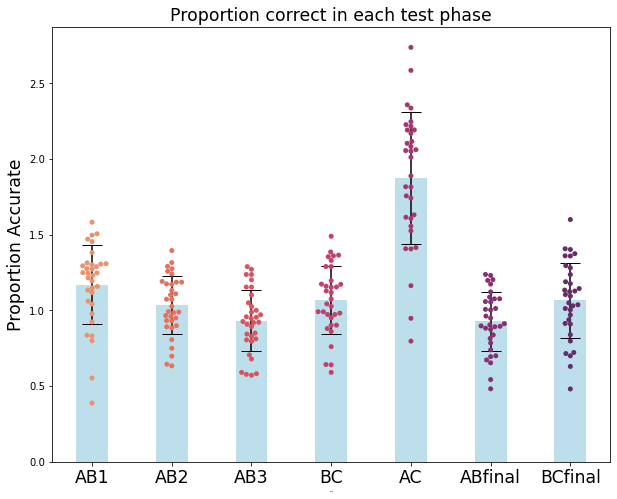

In [10]:
AB1_mean = np.mean(avg_AB1)
AB2_mean = np.mean(avg_AB2)
AB3_mean = np.mean(avg_AB3)
BC_mean = np.mean(avg_BC)
AC_mean = np.mean(avg_AC)
ABfinal_mean = np.mean(avg_ABfinal)
BCfinal_mean = np.mean(avg_BCfinal)

AB1_std = np.std(avg_AB1)
AB2_std = np.std(avg_AB2)
AB3_std = np.std(avg_AB3)
BC_std = np.std(avg_BC)
AC_std = np.std(avg_AC)
ABfinal_std = np.std(avg_ABfinal)
BCfinal_std = np.std(avg_BCfinal)

# Define labels, positions, bar heights and error bar heights
labels = ['AB1', 'AB2', 'AB3', 'BC', 'AC', 'ABfinal', 'BCfinal']
x_pos = np.arange(len(labels))
CTEs = [AB1_mean, AB2_mean, AB3_mean, BC_mean, AC_mean, ABfinal_mean, BCfinal_mean]
error = [AB1_std, AB2_std, AB3_std, BC_std, AC_std, ABfinal_std, BCfinal_std]

# Build the plot
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(data=melted_df, y = 'Total_acc', x = 'condition', palette = 'flare', ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='lightblue',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Proportion Accurate', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Proportion correct in each test phase', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

# JUNK _________________________________

In [23]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_AC_neu = []
avg_ABfinal_neu = []
avg_BCfinal_neu = []

avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_AC_emo = []
avg_ABfinal_emo = []
avg_BCfinal_emo = []

for pt_file in all_good:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    finalABcorr = df.key_resp_30_corr
    finalBCcorr = df.key_resp_31_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    finalAB_trialresp = df.key_resp_30_keys
    finalBC_trialresp = df.key_resp_31_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BC_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    finalAB_trialresp_rt = df.key_resp_30_rt
    finalBC_trialresp_rt = df.key_resp_31_rt
    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BC_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image
    ABfinal_trialtype = df.final1_face_image
    BCfinal_trialtype = df.final2_face_image
    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    t_finalABtrials = []
    t_finalBCtrials = []
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_ACtrials = []
    fear_finalABtrials = []
    fear_finalBCtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_ACtrials = []
    neut_finalABtrials = []
    neut_finalBCtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_ACcorr = []
    f_finalABcorr = []
    f_finalBCcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_ACcorr = []
    n_finalABcorr = []
    n_finalBCcorr = []
    
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = np.mean(f_ACcorr)
        prop_correctAC_neut = np.mean(n_ACcorr)
    except:
        pass
            
    for index, row in df.iterrows():
        valence1 = AB1_trialtype[index]
        valence2 = AB2_trialtype[index]
        valence3 = AB3_trialtype[index]
        valenceBC = BC_trialtype[index]
        valencefinalAB = ABfinal_trialtype[index]
        valencefinalBC = BCfinal_trialtype[index]
        
        if np.isnan(AB1_trialresp[index]) == False:
            #valence1 = AB1_trialtype[index]
            if valence1[2:6] == 'fear':
                fear_AB1trials.append(AB1_trialresp_rt[index])
                if AB1corr[index] == 1:
                    f_AB1corr.append(AB1_trialresp_rt[index])
            if valence1[2:6] == 'neut':
                neut_AB1trials.append(AB1_trialresp_rt[index])
                if AB1corr[index] == 1:
                    n_AB1corr.append(AB1_trialresp_rt[index])

        #prop_correct_emo = len(f_AB1corr)/len(fear_AB1trials)
        #prop_correct_neut = len(n_AB1corr)/len(neut_AB1trials)

        ##################################################################

        if np.isnan(AB2_trialresp[index]) == False:
            if valence2[2:6] == 'fear':
                fear_AB2trials.append(AB2_trialresp_rt[index])
                if AB2corr[index] == 1:
                    f_AB2corr.append(AB2_trialresp_rt[index])
            if valence2[2:6] == 'neut':
                neut_AB2trials.append(AB2_trialresp_rt[index])
                if AB2corr[index] == 1:
                    n_AB2corr.append(AB2_trialresp_rt[index])

       #################################################################

        if np.isnan(AB3_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    f_AB3corr.append(AB3_trialresp_rt[index])
            elif valence3[2:6] == 'neut':
                neut_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    n_AB3corr.append(AB3_trialresp_rt[index])

        ######################################################################

        if np.isnan(BC_trialresp[index]) == False:
            if valenceBC[2:6] == 'fear':
                fear_BCtrials.append(BC_trialresp_rt[index])
                if BCcorr[index] == 1:
                    f_BCcorr.append(BC_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_BCtrials.append(BC_trialresp_rt[index])
                if BCcorr[index] == 1:
                    n_BCcorr.append(BC_trialresp_rt[index])

        #############################################################


        if np.isnan(finalAB_trialresp[index]) == False:
            if valencefinalAB[2:6] == 'fear':
                fear_finalABtrials.append(finalAB_trialresp_rt[index])
                if finalABcorr[index] == 1:
                    f_finalABcorr.append(finalAB_trialresp_rt[index])
            elif valencefinalAB[2:6] == 'neut':
                neut_finalABtrials.append(finalAB_trialresp_rt[index])
                if finalABcorr[index] == 1:
                    n_finalABcorr.append(finalAB_trialresp_rt[index])

        ######################################################################
        if np.isnan(finalBC_trialresp[index]) == False:
            if valencefinalBC[2:6] == 'fear':
                fear_finalBCtrials.append(finalBC_trialresp_rt[index])
                if finalBCcorr[index] == 1:
                    f_finalBCcorr.append(finalBC_trialresp_rt[index])
            elif valencefinalBC[2:6] == 'neut':
                neut_finalBCtrials.append(finalBC_trialresp_rt[index])
                if finalBCcorr[index] == 1:
                    n_finalBCcorr.append(finalBC_trialresp_rt[index])
                    
    try:
        prop_correct_emo = np.mean(f_AB1corr)
        prop_correct_neut = np.mean(n_AB1corr)
        prop_correct2_emo = np.mean(f_AB2corr)
        prop_correct2_neut = np.mean(n_AB2corr)
        prop_correct3_emo = np.mean(f_AB3corr)
        prop_correct3_neut = np.mean(n_AB3corr)
        prop_correctBC_emo = np.mean(f_BCcorr)
        prop_correctBC_neut = np.mean(n_BCcorr)


        prop_correctABfinal_emo = np.mean(f_finalABcorr)
        prop_correctABfinal_neut = np.mean(n_finalABcorr)
        prop_correctBCfinal_emo = np.mean(f_finalBCcorr)
        prop_correctBCfinal_neut = np.mean(n_finalBCcorr)
    except:
            pass
       
    ##############################################################################
    ## THE AC TEST!! 

    subid.append(participant_name)

    avg_AB1_neu.append(prop_correct_neut)
    avg_AB2_neu.append(prop_correct2_neut)
    avg_AB3_neu.append(prop_correct3_neut)
    avg_BC_neu.append(prop_correctBC_neut)
    avg_AC_neu.append(prop_correctAC_neut)
    avg_ABfinal_neu.append(prop_correctABfinal_neut)
    avg_BCfinal_neu.append(prop_correctBCfinal_neut)

    avg_AB1_emo.append(prop_correct_emo)
    avg_AB2_emo.append(prop_correct2_emo)
    avg_AB3_emo.append(prop_correct3_emo)
    avg_BC_emo.append(prop_correctBC_emo)
    avg_AC_emo.append(prop_correctAC_emo)
    avg_ABfinal_emo.append(prop_correctABfinal_emo)
    avg_BCfinal_emo.append(prop_correctBCfinal_emo)
    

In [24]:
val_df = pd.DataFrame(list(zip(subid, avg_AB1_neu, avg_AB2_neu, avg_AB3_neu, avg_BC_neu, avg_AC_neu, avg_ABfinal_neu, avg_BCfinal_neu, avg_AB1_emo, avg_AB2_emo, avg_AB3_emo, avg_BC_emo, avg_AC_emo, avg_ABfinal_emo, avg_BCfinal_emo)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg AC','Avg ABfinal', 'Avg BCfinal', 'Avg AB1_emo', 'Avg AB2_emo', 'Avg AB3_emo', 'Avg BC_emo', 'Avg AC_emo', 'Avg ABfinal_emo', 'Avg BCfinal_emo'])

val_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_RT_valence.csv', index = False, header = True)

val_df


,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg AC,Avg ABfinal,Avg BCfinal,Avg AB1_emo,Avg AB2_emo,Avg AB3_emo,Avg BC_emo,Avg AC_emo,Avg ABfinal_emo,Avg BCfinal_emo
0,A0017268R9SKD8U2Y3F,1.188615,0.868461,0.638793,0.841408,1.885889,0.619498,0.781149,1.320110,0.995623,1.007748,1.096032,1.734001,0.774466,0.660652
1,A12HWPFXQPITHD,1.224767,1.069100,1.073051,1.232893,2.312490,0.746494,1.007237,1.361856,1.187676,0.882175,1.469190,1.686990,1.166472,1.067367
2,A14WLAP6TCEKO0,1.183701,1.085636,1.204105,0.668516,2.127874,1.175591,1.222137,1.044177,1.055626,1.274909,0.834920,2.304079,1.235623,0.926582
3,A16G6PPH1INQL8,1.334674,0.955489,1.018429,1.000255,1.669490,0.905642,0.942679,1.274957,1.118929,0.922157,0.907119,1.144061,0.916754,0.858535
4,A1C5SQZ045W0L5,1.480021,1.091421,1.035213,1.270329,2.234501,1.001373,1.070697,1.435570,1.049434,1.063797,1.466961,2.452573,1.003137,1.329537
5,A1IFIK8J49WBER,0.860240,1.182193,0.946272,0.906748,1.788186,0.837411,0.995905,1.261024,1.197826,0.882294,1.163848,1.993370,0.980994,1.059629
6,A2AZYU1CT24O0K,1.134955,0.688615,0.565784,0.993252,1.576358,0.522499,0.617551,0.728664,0.570435,0.612579,0.808299,1.535032,0.562136,0.639814
7,A2F1AA15HG0FRU,1.413031,1.206612,0.986861,1.380146,2.458133,1.224415,1.547956,1.532193,1.395927,1.227350,1.293621,3.128032,1.235556,1.676883
8,A2RVFMCKSSEHDV,1.102359,1.249705,1.226486,1.180486,2.621508,1.092979,1.428065,1.177470,1.073469,1.314542,1.547892,2.532783,1.232223,1.394360
9,A2UOSEPGNUITM8,1.102695,0.962699,0.635131,0.926906,1.986773,0.783668,0.981038,1.319914,0.898692,0.722910,1.140694,2.200733,0.840205,0.956544


In [25]:
valence_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg AC', 'Avg ABfinal', 'Avg BCfinal', 'Avg AB1_emo', 'Avg AB2_emo', 'Avg AB3_emo', 'Avg BC_emo', 'Avg AC_emo', 'Avg ABfinal_emo', 'Avg BCfinal_emo'], var_name='condition', value_name='Total_acc')
valence_df

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AB1,1.188615
1,A12HWPFXQPITHD,Avg AB1,1.224767
2,A14WLAP6TCEKO0,Avg AB1,1.183701
3,A16G6PPH1INQL8,Avg AB1,1.334674
4,A1C5SQZ045W0L5,Avg AB1,1.480021
...,...,...,...
457,A3JTDNRJYVCGQD,Avg BCfinal_emo,0.724260
458,A38I0E8UK53ME5,Avg BCfinal_emo,1.175214
459,A1F6MWP9A0XLJQ,Avg BCfinal_emo,1.303370
460,A2UYZFH5VT5R3H,Avg BCfinal_emo,1.158762


In [26]:
discard2 = []
for index, rows in valence_df.iterrows():
    if valence_df.condition[index] == 'Avg AB3_emo' and valence_df.Total_acc[index] <= 0.60:
        discard2.append(valence_df.participant[index])
print(discard2)

[]


In [27]:
discard3 = []
for index, rows in valence_df.iterrows():
    if valence_df.condition[index] == 'Avg AC_emo' and valence_df.Total_acc[index] <= 0.33:
        discard3.append(valence_df.participant[index])
print(discard3)

[]


In [28]:
valence_df.loc[valence_df['condition'] == 'Avg AB1', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AB2', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AC', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg ABfinal', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg BCfinal', 'valence'] = 'c-neutral'

valence_df.loc[valence_df['condition'] == 'Avg AB1_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AB2_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AC_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg ABfinal_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg BCfinal_emo', 'valence'] = 'fearful'


In [29]:
valence_df

,participant,condition,Total_acc,valence
0,A0017268R9SKD8U2Y3F,Avg AB1,1.188615,c-neutral
1,A12HWPFXQPITHD,Avg AB1,1.224767,c-neutral
2,A14WLAP6TCEKO0,Avg AB1,1.183701,c-neutral
3,A16G6PPH1INQL8,Avg AB1,1.334674,c-neutral
4,A1C5SQZ045W0L5,Avg AB1,1.480021,c-neutral
...,...,...,...,...
457,A3JTDNRJYVCGQD,Avg BCfinal_emo,0.724260,fearful
458,A38I0E8UK53ME5,Avg BCfinal_emo,1.175214,fearful
459,A1F6MWP9A0XLJQ,Avg BCfinal_emo,1.303370,fearful
460,A2UYZFH5VT5R3H,Avg BCfinal_emo,1.158762,fearful


In [30]:
comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo', 'Avg AC', 'Avg AC_emo', 'Avg ABfinal', 'Avg ABfinal_emo', 'Avg BCfinal', 'Avg BCfinal_emo'], var_name='condition', value_name='Total_acc')
comp_df

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AB3,0.638793
1,A12HWPFXQPITHD,Avg AB3,1.073051
2,A14WLAP6TCEKO0,Avg AB3,1.204105
3,A16G6PPH1INQL8,Avg AB3,1.018429
4,A1C5SQZ045W0L5,Avg AB3,1.035213
...,...,...,...
325,A3JTDNRJYVCGQD,Avg BCfinal_emo,0.724260
326,A38I0E8UK53ME5,Avg BCfinal_emo,1.175214
327,A1F6MWP9A0XLJQ,Avg BCfinal_emo,1.303370
328,A2UYZFH5VT5R3H,Avg BCfinal_emo,1.158762


In [31]:
comp_df.loc[comp_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg AC', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg ABfinal', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg BCfinal', 'valence'] = 'c-neutral'

comp_df.loc[comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg AC_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg ABfinal_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg BCfinal_emo', 'valence'] = 'fearful'


comp_df.loc[comp_df['condition'] == 'Avg AB3', 'Test'] = 'AB3'
comp_df.loc[comp_df['condition'] == 'Avg BC', 'Test'] = 'BC'
comp_df.loc[comp_df['condition'] == 'Avg AC', 'Test'] = 'AC'
comp_df.loc[comp_df['condition'] == 'Avg ABfinal', 'Test'] = 'ABfinal'
comp_df.loc[comp_df['condition'] == 'Avg BCfinal', 'Test'] = 'BCfinal'

comp_df.loc[comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'AB3'
comp_df.loc[comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'BC'
comp_df.loc[comp_df['condition'] == 'Avg AC_emo', 'Test'] = 'AC'
comp_df.loc[comp_df['condition'] == 'Avg ABfinal_emo', 'Test'] = 'ABfinal'
comp_df.loc[comp_df['condition'] == 'Avg BCfinal_emo', 'Test'] = 'BCfinal'

In [32]:
comp_df

,participant,condition,Total_acc,valence,Test
0,A0017268R9SKD8U2Y3F,Avg AB3,0.638793,c-neutral,AB3
1,A12HWPFXQPITHD,Avg AB3,1.073051,c-neutral,AB3
2,A14WLAP6TCEKO0,Avg AB3,1.204105,c-neutral,AB3
3,A16G6PPH1INQL8,Avg AB3,1.018429,c-neutral,AB3
4,A1C5SQZ045W0L5,Avg AB3,1.035213,c-neutral,AB3
...,...,...,...,...,...
325,A3JTDNRJYVCGQD,Avg BCfinal_emo,0.724260,fearful,BCfinal
326,A38I0E8UK53ME5,Avg BCfinal_emo,1.175214,fearful,BCfinal
327,A1F6MWP9A0XLJQ,Avg BCfinal_emo,1.303370,fearful,BCfinal
328,A2UYZFH5VT5R3H,Avg BCfinal_emo,1.158762,fearful,BCfinal


C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


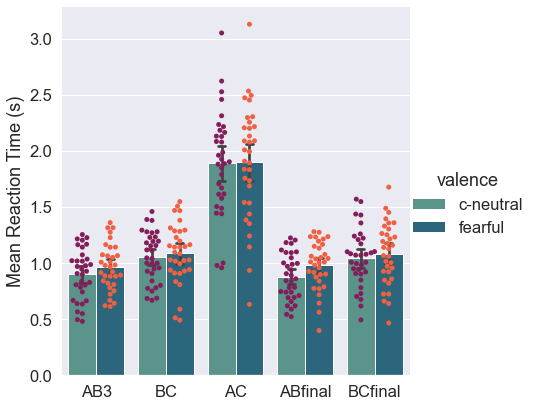

In [33]:
sns.set(font_scale = 1.5)
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=comp_df,
 height=6, kind="bar", palette="crest", capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=comp_df, palette="rocket", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
#plt.ylim(-0.1, 1.05)
plt.ylabel("Mean Reaction Time (s)")
plt.xlabel('')
plt.show()

In [34]:
preAC_comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB1_emo', 'Avg AB2', 'Avg AB2_emo','Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo'], var_name='condition', value_name='Total_acc')
preAC_comp_df

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AB1,1.188615
1,A12HWPFXQPITHD,Avg AB1,1.224767
2,A14WLAP6TCEKO0,Avg AB1,1.183701
3,A16G6PPH1INQL8,Avg AB1,1.334674
4,A1C5SQZ045W0L5,Avg AB1,1.480021
...,...,...,...
259,A3JTDNRJYVCGQD,Avg BC_emo,1.028035
260,A38I0E8UK53ME5,Avg BC_emo,1.141938
261,A1F6MWP9A0XLJQ,Avg BC_emo,1.282429
262,A2UYZFH5VT5R3H,Avg BC_emo,1.506916


In [35]:
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1', 'valence'] = 'c-neutral'

preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1_emo', 'valence'] = 'fearful'


preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3', 'Test'] = 'AB3'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC', 'Test'] = 'BC'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2', 'Test'] = 'AB2'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1', 'Test'] = 'AB1'

preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'AB3'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'BC'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2_emo', 'Test'] = 'AB2'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1_emo', 'Test'] = 'AB1'

In [36]:
preAC_comp_df

,participant,condition,Total_acc,valence,Test
0,A0017268R9SKD8U2Y3F,Avg AB1,1.188615,c-neutral,AB1
1,A12HWPFXQPITHD,Avg AB1,1.224767,c-neutral,AB1
2,A14WLAP6TCEKO0,Avg AB1,1.183701,c-neutral,AB1
3,A16G6PPH1INQL8,Avg AB1,1.334674,c-neutral,AB1
4,A1C5SQZ045W0L5,Avg AB1,1.480021,c-neutral,AB1
...,...,...,...,...,...
259,A3JTDNRJYVCGQD,Avg BC_emo,1.028035,fearful,BC
260,A38I0E8UK53ME5,Avg BC_emo,1.141938,fearful,BC
261,A1F6MWP9A0XLJQ,Avg BC_emo,1.282429,fearful,BC
262,A2UYZFH5VT5R3H,Avg BC_emo,1.506916,fearful,BC


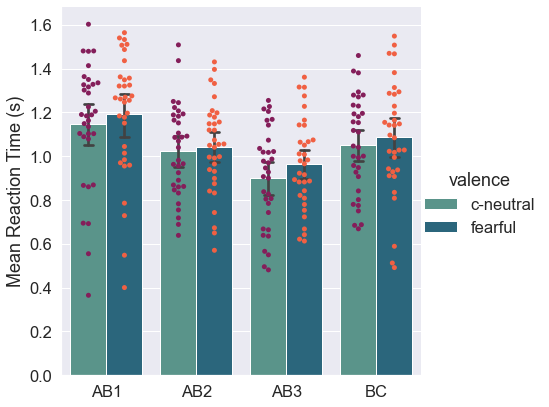

In [38]:
sns.set(font_scale = 1.5)
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=preAC_comp_df,
 height=6, kind="bar", palette="crest", capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=preAC_comp_df, palette="rocket", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
#plt.ylim(-0.1, 1.05)
plt.ylabel("Mean Reaction Time (s)")
plt.xlabel('')
plt.show()

In [40]:
AB_comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo', 'Avg ABfinal', 'Avg ABfinal_emo', 'Avg BCfinal', 'Avg BCfinal_emo'], var_name='condition', value_name='Total_acc')
AB_comp_df

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AB3,0.638793
1,A12HWPFXQPITHD,Avg AB3,1.073051
2,A14WLAP6TCEKO0,Avg AB3,1.204105
3,A16G6PPH1INQL8,Avg AB3,1.018429
4,A1C5SQZ045W0L5,Avg AB3,1.035213
...,...,...,...
259,A3JTDNRJYVCGQD,Avg BCfinal_emo,0.724260
260,A38I0E8UK53ME5,Avg BCfinal_emo,1.175214
261,A1F6MWP9A0XLJQ,Avg BCfinal_emo,1.303370
262,A2UYZFH5VT5R3H,Avg BCfinal_emo,1.158762


In [41]:
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3', 'valence'] = 'AB-control'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'valence'] = 'BC-control'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal', 'valence'] = 'AB-control'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal', 'valence'] = 'BC-control'

AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'AB-fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'BC-fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal_emo', 'valence'] = 'AB-fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal_emo', 'valence'] = 'BC-fearful'


AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal', 'Test'] = 'post'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal', 'Test'] = 'post'

AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal_emo', 'Test'] = 'post'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal_emo', 'Test'] = 'post'

In [42]:
AB_comp_df

,participant,condition,Total_acc,valence,Test
0,A0017268R9SKD8U2Y3F,Avg AB3,0.638793,AB-control,pre
1,A12HWPFXQPITHD,Avg AB3,1.073051,AB-control,pre
2,A14WLAP6TCEKO0,Avg AB3,1.204105,AB-control,pre
3,A16G6PPH1INQL8,Avg AB3,1.018429,AB-control,pre
4,A1C5SQZ045W0L5,Avg AB3,1.035213,AB-control,pre
...,...,...,...,...,...
259,A3JTDNRJYVCGQD,Avg BCfinal_emo,0.724260,BC-fearful,post
260,A38I0E8UK53ME5,Avg BCfinal_emo,1.175214,BC-fearful,post
261,A1F6MWP9A0XLJQ,Avg BCfinal_emo,1.303370,BC-fearful,post
262,A2UYZFH5VT5R3H,Avg BCfinal_emo,1.158762,BC-fearful,post


Text(0, 0.5, 'Reaction Time (s)')

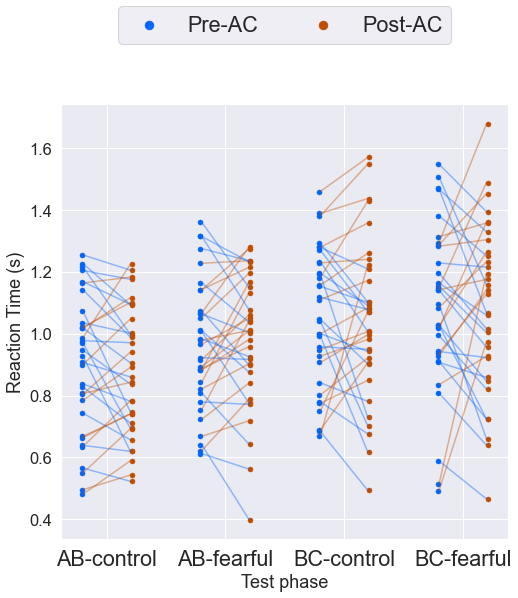

In [44]:
#check for interference
#here if there is a difference between pre and post AC test, it will be indicated by different colors. 
#If pre AC performance is better than the post AC performance, line is blue, otherwise red!
#note that if there is no difference, i.e, if pre-post = 0, the line is still red!
red = '#c04e01'
blue = '#0165fc'
fig, ax = plt.subplots(figsize=(8, 8))

# Set up list to track sites
valences = []

i = 1.0
for valence, subdf in AB_comp_df.groupby('valence'):
    valences.append(valence)
    # Get the values for healthy and disease patients
    h = subdf.query('Test == "pre"')['Total_acc'].values
    d = subdf.query('Test == "post"')['Total_acc'].values
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
 # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]
    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)
    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)
 # Plot the points
 # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue,
    s=25, lw=0.5, label='Pre-AC')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
    s=25, lw=0.5, label='Post-AC')
 # Update x-axis
    i += 1
# Fix the axes and labels
ax.set_xticks([1, 2, 3, 4])
_ = ax.set_xticklabels(valences, fontsize='large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
    fontsize='large',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test phase')
ax.set_ylabel('Reaction Time (s)')
    #fig.savefig('mean_bias_context_age_source_corr_points.pdf')

In [57]:
h-d

array([ 0.08333333,  0.01992754,  0.125     , -0.05681818,  0.        ,
        0.        , -0.18452381, -0.08333333,  0.07608696, -0.08333333,
        0.19565217,  0.16666667, -0.08333333, -0.04166667,  0.08333333,
       -0.125     , -0.11594203,  0.        , -0.3134058 ,  0.19762846,
       -0.08333333,  0.01086957, -0.04166667, -0.16666667, -0.19384058,
       -0.20833333,  0.04166667,  0.08333333,  0.125     ,  0.04166667])

In [58]:
line_colors

['#0165fc',
 '#0165fc',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#0165fc',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#0165fc',
 '#0165fc',
 '#0165fc']